En este script, se compara los rendimientos generados por los distintos modelos entrenados anteriormente.

Primero, se importan las librerías necesarias

In [62]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

Se definen los directorios que se van a emplear

In [63]:
ROOT_DIR = Path.cwd()
RESULTS_DIR = ROOT_DIR / "validation_results"

In [64]:
df_metrics = pd.read_csv(RESULTS_DIR / "metrics_comparison.csv")
df_metrics.sort_values(by="mAP@50-95", ascending=False, inplace=True)

df_metrics

,Modelo,Precision,Recall,F1-Score,mAP@50,mAP@50-95,Avg Inference Time (ms)
0,yolov8x.pt,0.722,0.683,0.702,0.805,0.617,575.3247
1,yolov8l.pt,0.734,0.660,0.695,0.794,0.617,452.6824
2,yolov8m.pt,0.688,0.665,0.677,0.777,0.596,232.8931
3,yolov8s.pt,0.693,0.608,0.648,0.694,0.537,97.4258
4,yolov8n.pt,0.713,0.553,0.623,0.624,0.456,49.4698


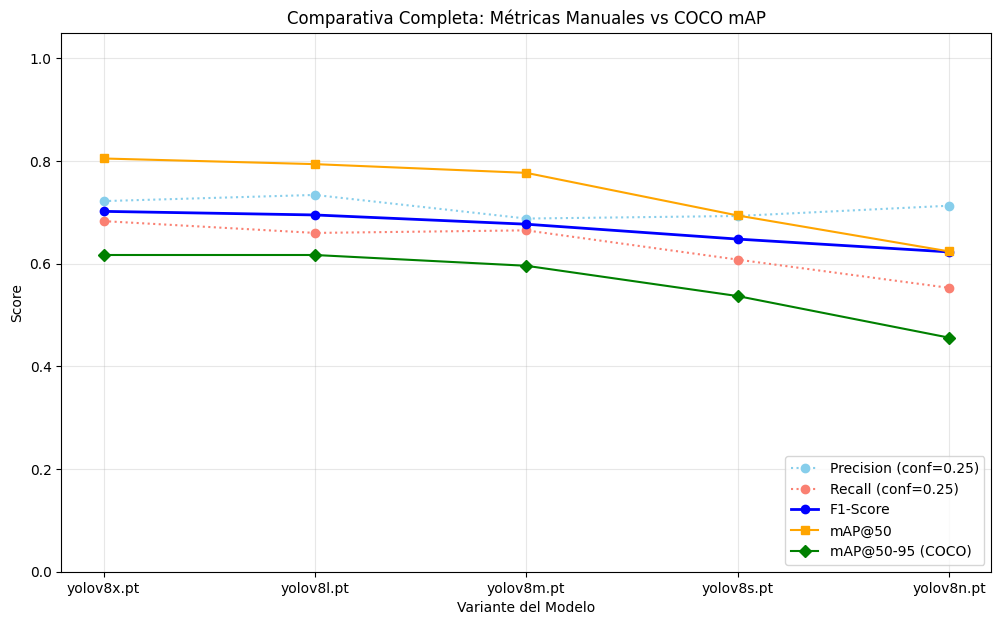

In [69]:
# Métricas Manuales (Líneas punteadas)
plt.figure(figsize=(12, 7))

plt.plot(df_metrics['Modelo'], df_metrics['Precision'], marker='o', linestyle=':', color='skyblue', label='Precision (conf=0.25)')
plt.plot(df_metrics['Modelo'], df_metrics['Recall'], marker='o', linestyle=':', color='salmon', label='Recall (conf=0.25)')
plt.plot(df_metrics['Modelo'], df_metrics['F1-Score'], marker='o', linestyle='-', linewidth=2, color='blue', label='F1-Score')

# Métricas mAP (Líneas sólidas gruesas)
plt.plot(df_metrics['Modelo'], df_metrics['mAP@50'], marker='s', linestyle='-', color='orange', label='mAP@50')
plt.plot(df_metrics['Modelo'], df_metrics['mAP@50-95'], marker='D', linestyle='-', color='green', label='mAP@50-95 (COCO)')
plt.title('Comparativa Completa: Métricas Manuales vs COCO mAP')
plt.xlabel('Variante del Modelo')
plt.ylabel('Score')
plt.legend(loc='lower right', frameon=True)
plt.grid(True, alpha=0.3)
plt.ylim(0, 1.05) # Fijar eje Y de 0 a 1
plt.savefig(RESULTS_DIR / "lines_comparison.png", dpi=300)
plt.show()



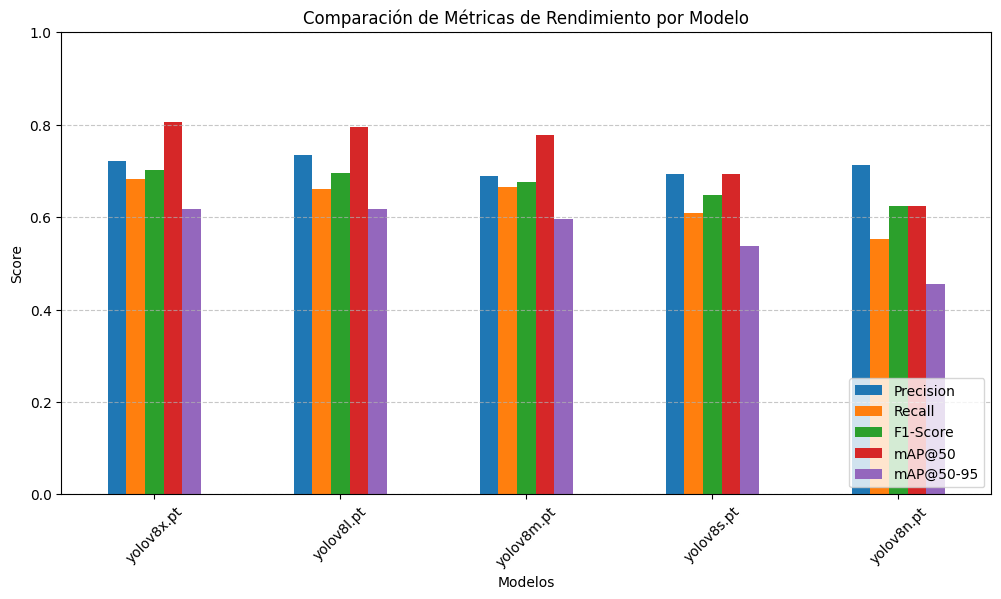

In [70]:
# Gráfico de barras para métricas excepto tiempo de inferencia
metrics_cols = ['Precision', 'Recall', 'F1-Score', 'mAP@50', 'mAP@50-95']
df_metrics.plot(x='Modelo', y=metrics_cols, kind='bar', figsize=(12, 6))
plt.title('Comparación de Métricas de Rendimiento por Modelo')
plt.ylabel('Score')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 1.0)
plt.savefig(RESULTS_DIR / "bar_comparison.png", dpi=300)
plt.show()

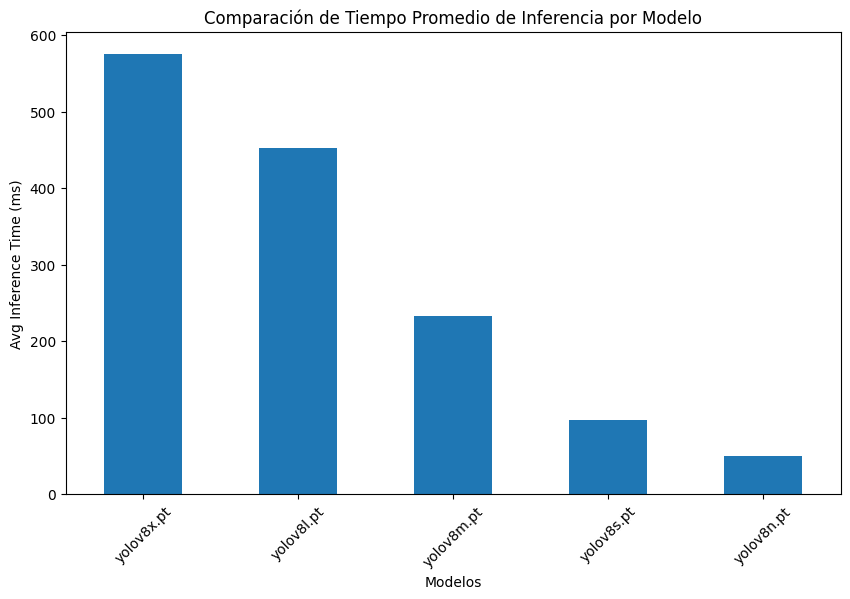

In [71]:
# Gráfico de barras comparativo de los tiempos de inferencia medios
df_metrics.plot.bar(x='Modelo', y='Avg Inference Time (ms)', figsize=(10, 6), legend=False)

plt.title('Comparación de Tiempo Promedio de Inferencia por Modelo')
plt.ylabel('Avg Inference Time (ms)')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.savefig(RESULTS_DIR / "inference_time_comparison.png", dpi=300)
plt.show()

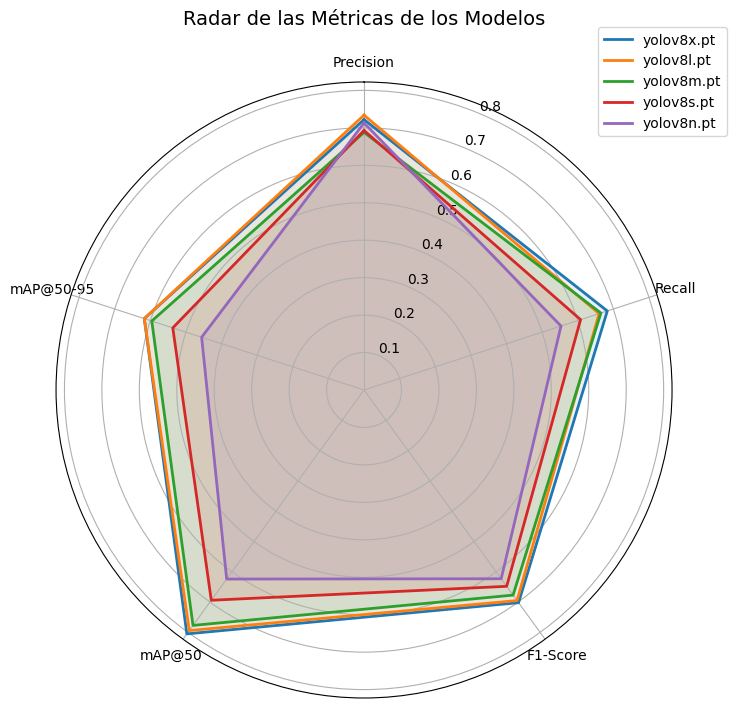

In [72]:
# Gráfico de radar
labels = df_metrics.columns[1:-1]  # Excluir 'Modelo' y 'Avg Inference Time (s)'
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1] # Cerrar el círculo

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'] 

for i, (index, row) in enumerate(df_metrics.iterrows()):
    model_name = row['Modelo']
    values = row[labels].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=model_name, color=colors[i % len(colors)])
    ax.fill(angles, values, color=colors[i % len(colors)], alpha=0.1)

ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
plt.title('Radar de las Métricas de los Modelos', y=1.08, fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.savefig(RESULTS_DIR / "radar_comparison.png", dpi=300)
plt.show()